In [1]:
"""
Two fluid model
compressible
differential equation system
well-posedness analysis
"""

# Libraries
from IPython.display import clear_output
from math import pi
from matplotlib import (rc, style)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.optimize import (brenth, fsolve)
from scipy.linalg import eigvals, eig
from scipy.sparse.linalg import eigs
from scipy.interpolate import interp1d

import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import time

# General configuration for plots
%matplotlib inline
font = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 18
        }
matplotlib.rc('font',family = 'Times New Roman')


minj1            = 1e-2 # epstest
maxj1            = 5

minj2            = 1e-1 # epstest
maxj2            = 30

<function matplotlib.pyplot.show(*args, **kw)>

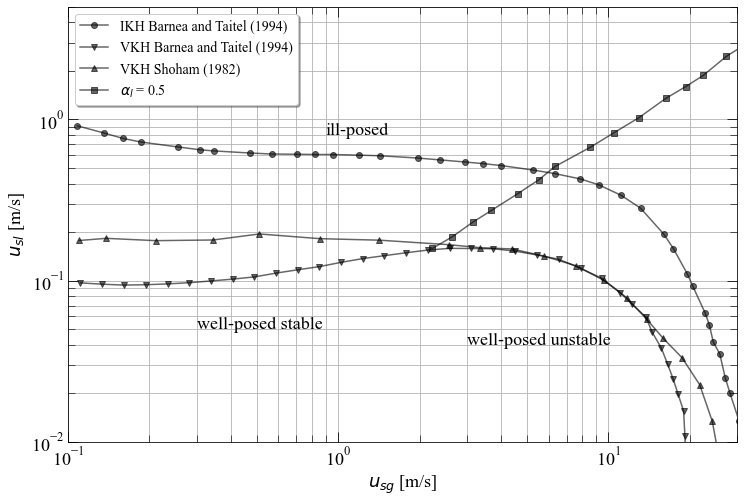

In [4]:
# Plot Barnea Shoham Taitel (1981) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# horizontal pipe d = 0.051

x1,y1 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_IKH.csv',
                 unpack = True, 
                 delimiter = ',')
x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_VKH.csv',
                 unpack = True, 
                 delimiter = ',')
x3,y3 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994horizontal/shoham1982_0deg.csv',
                 unpack = True, 
                 delimiter = ',')
x4,y4 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_hlD.csv',
                 unpack = True, 
                 delimiter = ',')

fig, ax = plt.subplots(1)

area = 25
alphaplot = 0.6
ax.loglog(x1,y1, 'ko-', alpha = alphaplot, label = 'IKH Barnea and Taitel (1994)')
ax.loglog(x2,y2, 'kv-', alpha = alphaplot, label = 'VKH Barnea and Taitel (1994)')
# ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
ax.loglog(x3,y3, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
ax.loglog(x4,y4, 'ks-', alpha = alphaplot, label = r'$\alpha_l$ = 0.5')

plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[1], handles[2], handles[3]]
labels = [labels[0], labels[1], labels[2], labels[3]]

leg1  = ax.legend (handles,
                   labels,
                   loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]', 
              fontsize = 18, 
              fontdict = font)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
              fontdict = font,
              fontsize = 18)

plt.text(0.3, 0.05, 'well-posed stable', size = 18)
plt.text(3.0, 0.04, 'well-posed unstable', size = 18)
plt.text(0.9, 0.8, 'ill-posed', size = 18)

plt.savefig('barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994horizontal.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

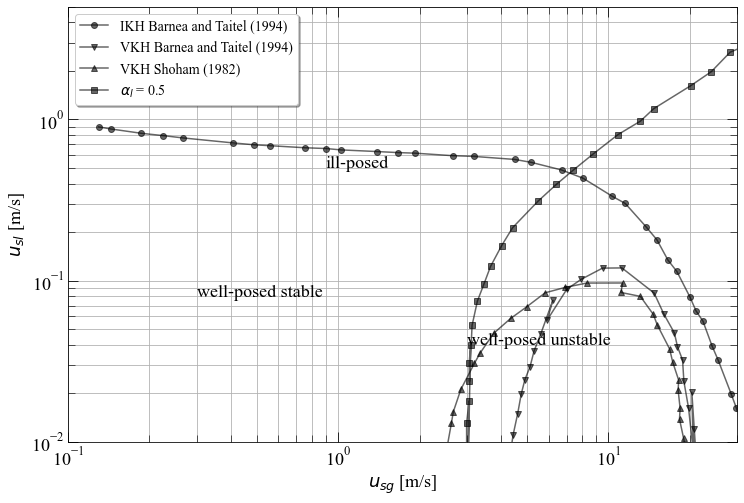

In [3]:
# Plot Barnea Shoham Taitel (1981) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# 0.25 deg inclined pipe d = 0.051

x1,y1 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_IKH.csv',
                 unpack = True, 
                 delimiter = ',')
x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_VKH.csv',
                 unpack = True, 
                 delimiter = ',')
x3,y3 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/shoham1982_025deg.csv',
                 unpack = True, 
                 delimiter = ',')
x4,y4 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994_025deg_hlD.csv',
                 unpack = True, 
                 delimiter = ',')

fig, ax = plt.subplots(1)

area = 25
alphaplot = 0.6
ax.loglog(x1,y1, 'ko-', alpha = alphaplot, label = 'IKH Barnea and Taitel (1994)')
ax.loglog(x2,y2, 'kv-', alpha = alphaplot, label = 'VKH Barnea and Taitel (1994)')
# ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
ax.loglog(x3,y3, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
ax.loglog(x4,y4, 'ks-', alpha = alphaplot, label = r'$\alpha_l$ = 0.5')

plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[1], handles[2], handles[3]]
labels = [labels[0], labels[1], labels[2], labels[3]]

leg1  = ax.legend (handles,
                   labels,
                   loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]', 
              fontsize = 18, 
              fontdict = font)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
              fontdict = font,
              fontsize = 18)

plt.text(0.3, 0.08, 'well-posed stable', size = 18)
plt.text(3.0, 0.04, 'well-posed unstable', size = 18)
plt.text(0.9, 0.5, 'ill-posed', size = 18)

plt.savefig('barnea1994_ikh-vkhlimits/barnea 1994_025/barnea1994025.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

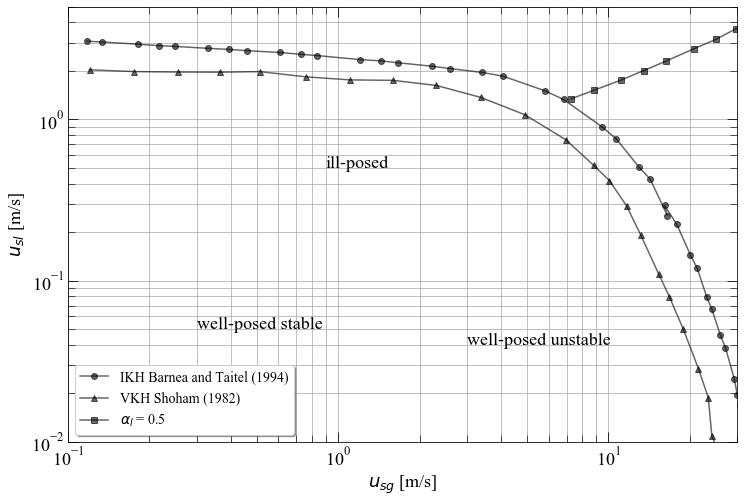

In [8]:
# Plot Barnea Shoham Taitel (1981) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# -5 deg inclined pipe d = 0.051

x1,y1 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/barnea1994_-5deg_IKH.csv',
                 unpack = True, 
                 delimiter = ',')
# x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994horizontal/barnea1994_0deg_VKH.csv',
#                  unpack = True, 
#                  delimiter = ',')
x2,y2 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/shoham1982_-5deg.csv',
                 unpack = True, 
                 delimiter = ',')
x3,y3 = np.loadtxt('barnea1994_ikh-vkhlimits/barnea1994-5/barnea1994_-5deg_hlD.csv',
                 unpack = True, 
                 delimiter = ',')

fig, ax = plt.subplots(1)

area = 25
alphaplot = 0.6
ax.loglog(x1,y1, 'ko-', alpha = alphaplot, label = 'IKH Barnea and Taitel (1994)')
# ax.loglog(x2,y2, 'kv-', alpha = alphaplot, label = 'VKH Barnea and Taitel (1994)')
# ax.scatter(x2,y2, s = area, marker = "v", color='k', alpha = alphaplot, edgecolors = 'k', linewidths = 1, label = 'VKH Barnea and Taitel (1994)')
ax.loglog(x2,y2, 'k^-', alpha = alphaplot, label = 'VKH Shoham (1982)')
ax.loglog(x3,y3, 'ks-', alpha = alphaplot, label = r'$\alpha_l$ = 0.5')

plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[1], handles[2]]
labels = [labels[0], labels[1], labels[2]]

leg1  = ax.legend (handles,
                   labels,
                   loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]', 
              fontsize = 18, 
              fontdict = font)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
              fontdict = font,
              fontsize = 18)

plt.text(0.3, 0.05, 'well-posed stable', size = 18)
plt.text(3.0, 0.04, 'well-posed unstable', size = 18)
plt.text(0.9, 0.5, 'ill-posed', size = 18)

plt.savefig('barnea1994_ikh-vkhlimits/barnea1994-5/barnea1994-5.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

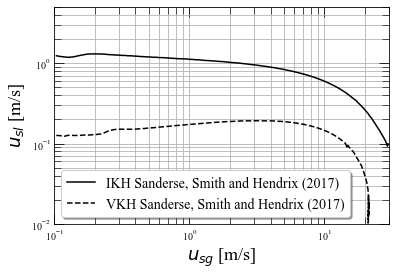

In [2]:
# Plot Sanderse, et.al (2017) for validation 
# https://automeris.io/WebPlotDigitizer/tutorial.html
# horizontal pipe d=0.078

x1,y1 = np.loadtxt('Sanderse2017_horizontal/well-posedness_sanderse.csv',
                 unpack = True, 
                 delimiter = ',')
x2,y2 = np.loadtxt('Sanderse2017_horizontal/globalstability_sanderse.csv',
                 unpack = True, 
                 delimiter = ',')
fig, ax = plt.subplots()

ax.loglog(x1,y1, 'k-', label = 'IKH Sanderse, Smith and Hendrix (2017)')
ax.loglog(x2,y2, 'k--', label = 'VKH Sanderse, Smith and Hendrix (2017)')

plt.ylim ((minj1, maxj1))
plt.xlim ((minj2, maxj2))
plt.grid (True, which = "both")
leg = ax.legend (loc = 'best',
                 fontsize = 14);
plt.rcParams ['figure.figsize'] = [12, 8]

matplotlib.rc ('xtick',
               labelsize = 18)     
matplotlib.rc ('ytick',
               labelsize = 18)
leg1  = ax.legend (loc = 'best',
                   shadow = True, 
                   frameon = True, 
                   fontsize = 14);

ax.xaxis.set_tick_params(which='major', size=10, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, direction='in', right='on')

ax.set_xlabel(r'$u_{sg}$ [m/s]',
            fontsize = 18)
ax.set_ylabel(r'$u_{sl}$ [m/s]',
            fontsize = 18)

plt.savefig('Sanderse2017_horizontal/stability_sanderse.png',
            ppi = 1200,
            transparent = True,
            bbox_inches = 'tight')
plt.show


In [1]:
# Exact solution for case Sanderse

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

tfin  = 6
k     = 2*pi

omegatest    = np.array ([ - 1758.05, 4.27    , 8.48    , 1931.47]) # deg 
rtest        = np.array ([ 1e-2     , 7.005e-3, 2.497e-1, -3.619 ]) # deg 

i=0
for i in range(4):
    print("omega = ", omegatest[i])
    mpl.rcParams ['legend.fontsize'] = 10
    fig   = plt.figure ()
    ax    = fig.gca (projection='3d')

    x     = np.linspace (0, 5*L, 1000)
    y     = np.linspace (0, tfin, 1000)
    z     = 0 + y*rtest [i]*np.sin (-k*x + omegatest [i]*y)
    ax.plot(x,
            y,
            z,
            color = listcolor [0],
            label='parametric curve')

    plt.rcParams ['figure.figsize'] = [12, 8]
    leg1  = ax.legend (loc = 'best',
                       frameon = True,
                       fontsize = 14,
                       shadow = True);
    plt.grid (True,
              which = "both")

    ax.set_xlabel('s[m]',
                  fontsize = 18)
    ax.set_ylabel('t[s]',
                  fontsize = 18)
    ax.set_zlabel('alpha[-]',
                  fontsize = 18)

    ax.set_xlim ((0, 5*L))
    ax.set_ylim ((0, tfin))
    # ax.set_zlim((0, 1))

    plt.show()
    i+=1

NameError: name 'pi' is not defined

NameError: name 'minj1' is not defined

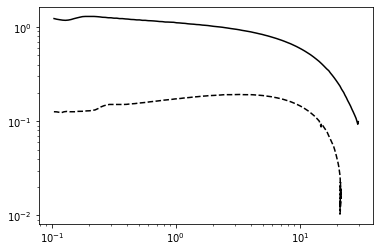